# Exploratory Data Analysis

---

The EDA process consists of the following steps:

1. **Load the dataset** using our custom loading function data.load().
2. **Analyze** some aspects of the images obtained from the dataset.
3. **Check for duplicate** images within the dataset.

In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
from pathlib import Path

from utils.visualization import data_count_plot
from utils.visualization import plot_histogram
from utils.duplicates import prepare_duplicates, visualize_duplicates

from utils import data

---
## 1. Loading Dataset

The load function reads the dataset and return a pandas.DataFrame with the following attributes:

**FEATURE COLUMNS:**

- **Path**: Path of the image.
- **Type**: Extension type of the image.
- **Width**: Width (in pixels) of the image.
- **Height**: Height (in pixels) of the image.
- **Ratio**: Aspect ratio of the image (Width/Height).
- **Mode**: Mode of the image. Define the type and depth of a pixel in the image.
- **Bands**: A string containing all bands of this image, separated by a space character.

**TARGET COLUMNS:**

- **<span style:color=red>Class</span>**: Category type from 6 furniture class.
- **<span style:color=red>Style</span>**: Interior style of the furniture image.

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading beds...
Loading beds/Asian...
Loading beds/Beach...
Loading beds/Contemporary...
Loading beds/Craftsman...
Loading beds/Eclectic...
Loading beds/Farmhouse...
Loading beds/Industrial...
Loading beds/Mediterranean...
Loading beds/Midcentury...
Loading beds/Modern...
Loading beds/Rustic...
Loading beds/Scandinavian...
Loading beds/Southwestern...
Loading beds/Traditional...
Loading beds/Transitional...
Loading beds/Tropical...
Loading beds/Victorian...
Loading chairs...
Loading chairs/Asian...
Loading chairs/Beach...
Loading chairs/Contemporary...
Loading chairs/Craftsman...
Loading chairs/Eclectic...
Loading chairs/Farmhouse...
Loading chairs/Industrial...
Loading chairs/Mediterranean...
Loading chairs/Midcentury...
Loading chairs/Modern...
Loading chairs/Rustic...
Loading chairs/Scandinavian...
Loading chairs/Southwestern...
Loading chairs/Traditional...
Loading chairs/Transitional...
Loading chairs/Tropical...
Loading chairs/Victorian...
Loading dressers...
Loading dressers/Asi

In [3]:
df.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [4]:
df.head()

,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian


---
## 2. Analyze features

In this step, using Histograms and Count plots, the following features are observed:
- HISTOGRAMS
    - **Size**: includes width and height. The focus is to spot any significant values that need to be taken under consideration.
    - **Ratio**: The most frequent ratio will be chosen to be the standard in preprocessing steps.
- COUNT PLOTS
    - **Type**: Select the most common image type to apply to the whole dataset.
    - **Mode**: RGB is the chosen mode for this project, any images with other modes must be processed.
    - **Class, Style**: Recognize any imbalance in the contribution between classes, styles and between styles in each class.

### Histogram Plot

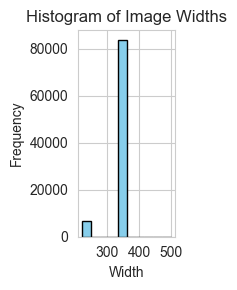

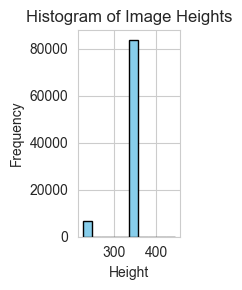

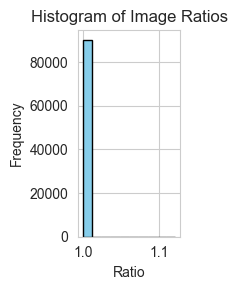

In [5]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

### Count plots

C:\Users\Kiet\DataspellProjects\Image-Classification-and-Recommendation\utils\visualization.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=rotation)
C:\Users\Kiet\DataspellProjects\Image-Classification-and-Recommendation\utils\visualization.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=rotation)


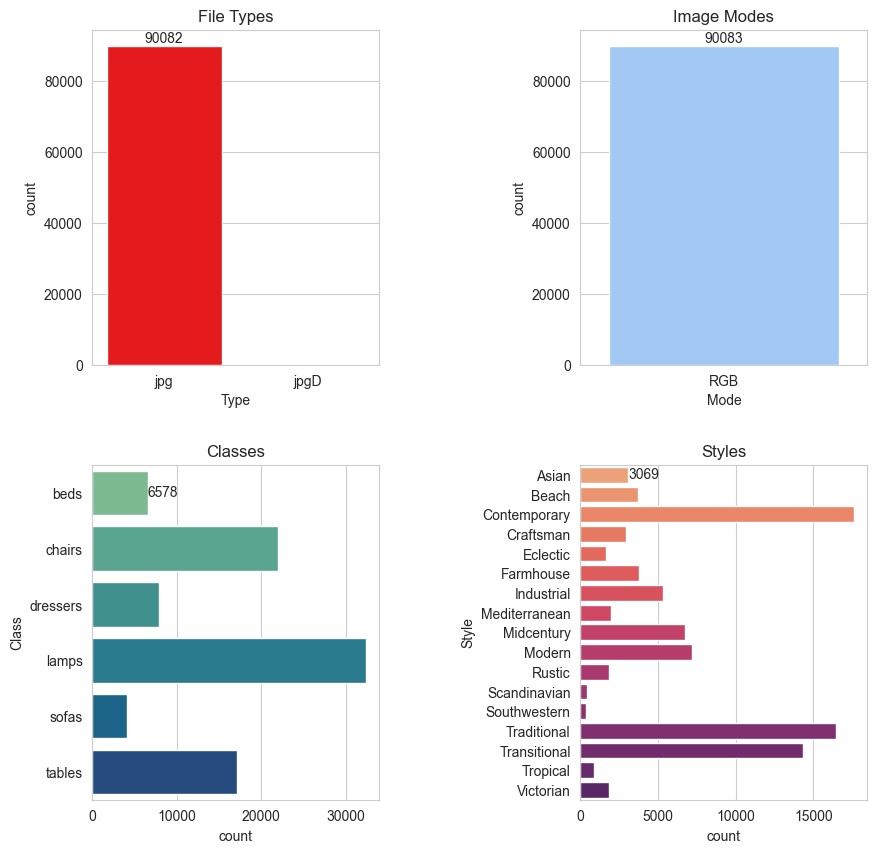

<Figure size 1000x1000 with 0 Axes>

In [6]:
# Display all in 1 plot

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.7)

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', palette='Set1')
data_count_plot(df, 'Mode', ax=ax[0][1], title='Image Modes', palette='pastel')
data_count_plot(df, 'Class', ax=ax[1][0], horizontal=True, title='Classes', palette='crest')
data_count_plot(df, 'Style', ax=ax[1][1], horizontal=True, title='Styles', palette='flare')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

# Display individually

# cols = ['Type', 'Mode', 'Class']

# for col in cols:data_count_plot(df, col, title=col)
# data_count_plot(df, 'Style', rotation=45)

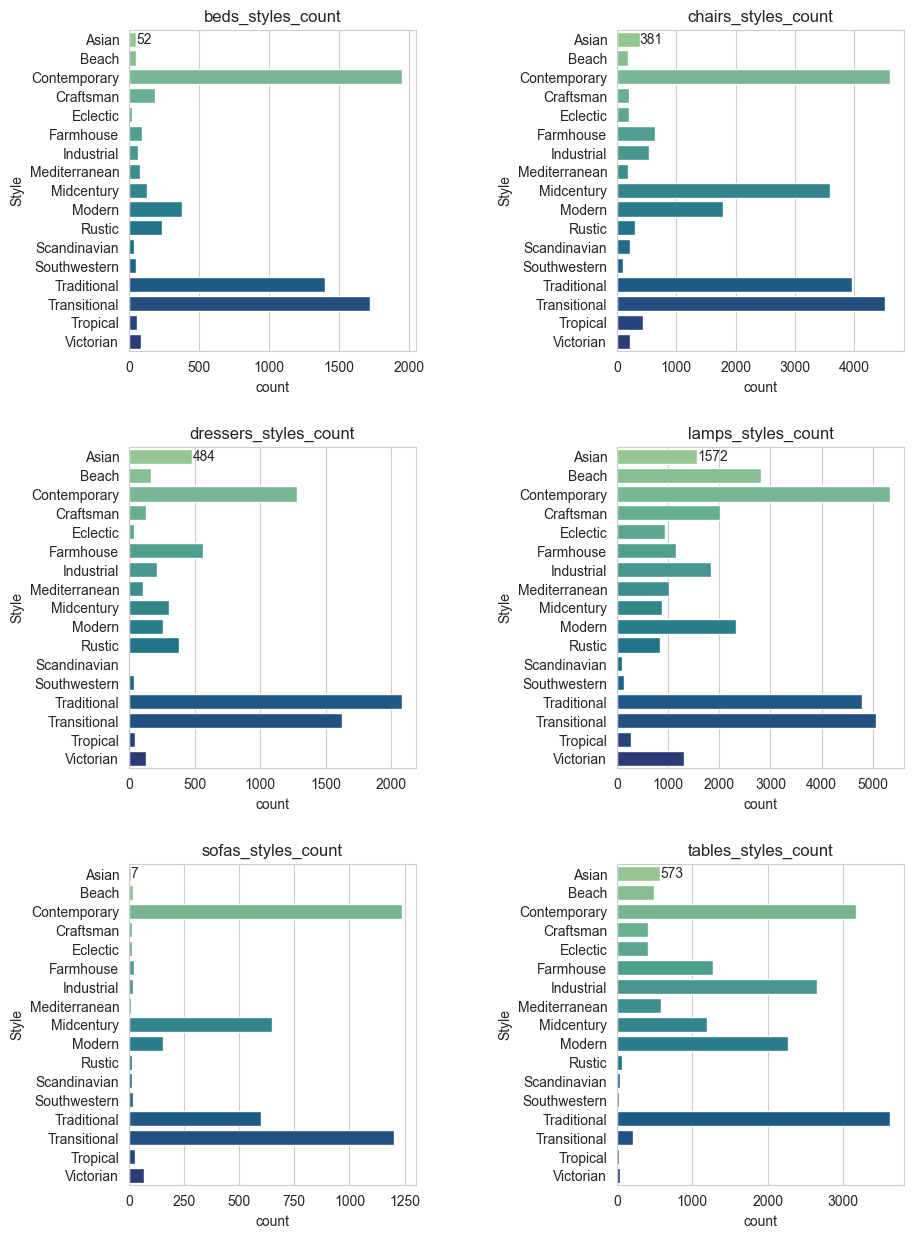

<Figure size 1000x1000 with 0 Axes>

In [7]:
classes = df['Class'].unique()

# Display all in 1 plot

fig, ax = plt.subplots(3, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.7)
ax = ax.flatten()

for i, class_name in enumerate(classes):
    data_count_plot(df[df['Class'] == class_name], col='Style', ax=ax[i], horizontal=True, title=class_name + '_styles_count', palette='crest')

    # Display individually

# for class_name in classes:
#     data_count_plot(df[df['Class'] == class_name], col='Style', horizontal=True, title=class_name + '_styles_count')"

---
## Duplicate identifying



In [8]:
df_hashed = df.copy() 

# Scan for duplicates. Returns a DataFrame with only duplicate images
duplicates = prepare_duplicates(df_hashed)

Calculating perceptual hash for all images...


Pandas Apply:   0%|          | 0/90083 [00:00<?, ?it/s]

Building approximate nearest neighbors using Annoy...
Identifying and grouping duplicates...


100%|██████████| 90083/90083 [00:03<00:00, 24011.58it/s]


Labelling duplicates group (non-duplicates are not included in result)...


100%|██████████| 82102/82102 [00:00<00:00, 3284098.79it/s]


Labelling duplicates type...


100%|██████████| 7159/7159 [00:24<00:00, 291.36it/s]


In [9]:
duplicates.head()

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
0,1,Duplicate,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian,eebf74aae9053ad5d568240597c2e14a3fcf97a3c2d52f...
24,1,Duplicate,beds/Asian/7634asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian,eebf74aae9053ad5d568240597c2e14a3fcf97a3c2d52f...
3,2,Duplicate,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,bfef19f7e44478aa9fd5e640e802d665e732c0c4d433e7...
18,2,Duplicate,beds/Asian/3413asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,bfef19f7e44478aa9fd5e640e802d664e732c0c4d433e7...
5,3,Duplicate,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,fe6eac456c0e47ba93b193b191117aaa85d542fe93d0d2...


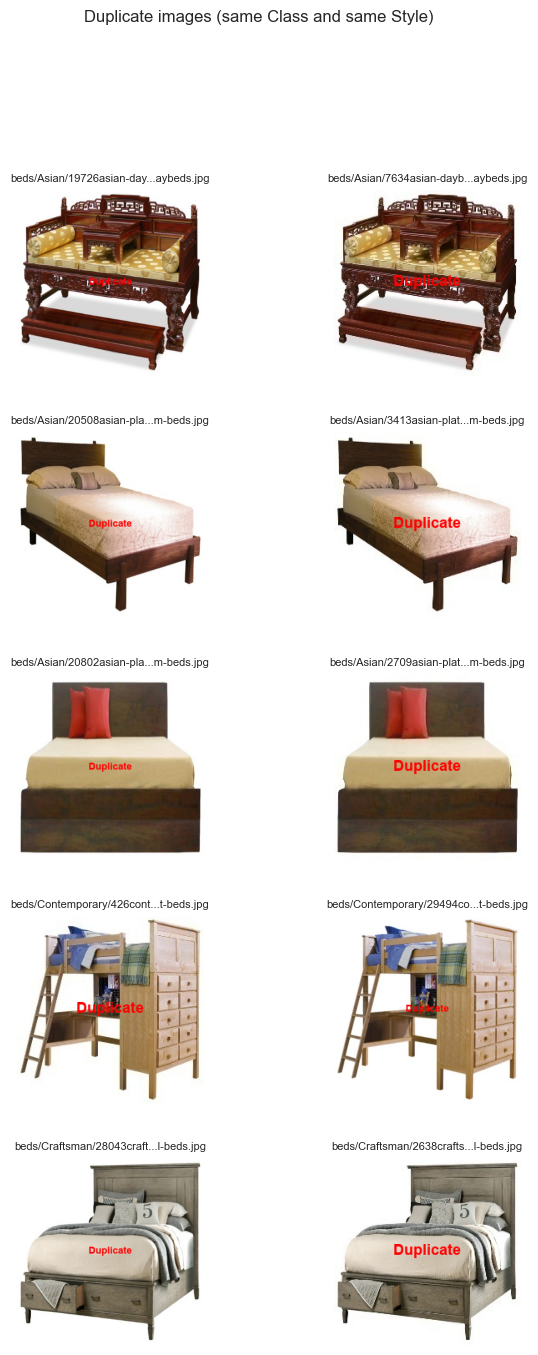

In [10]:
# Visualize duplicate with same class and same style
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Duplicate"], title="Duplicate images (same Class and same Style)")

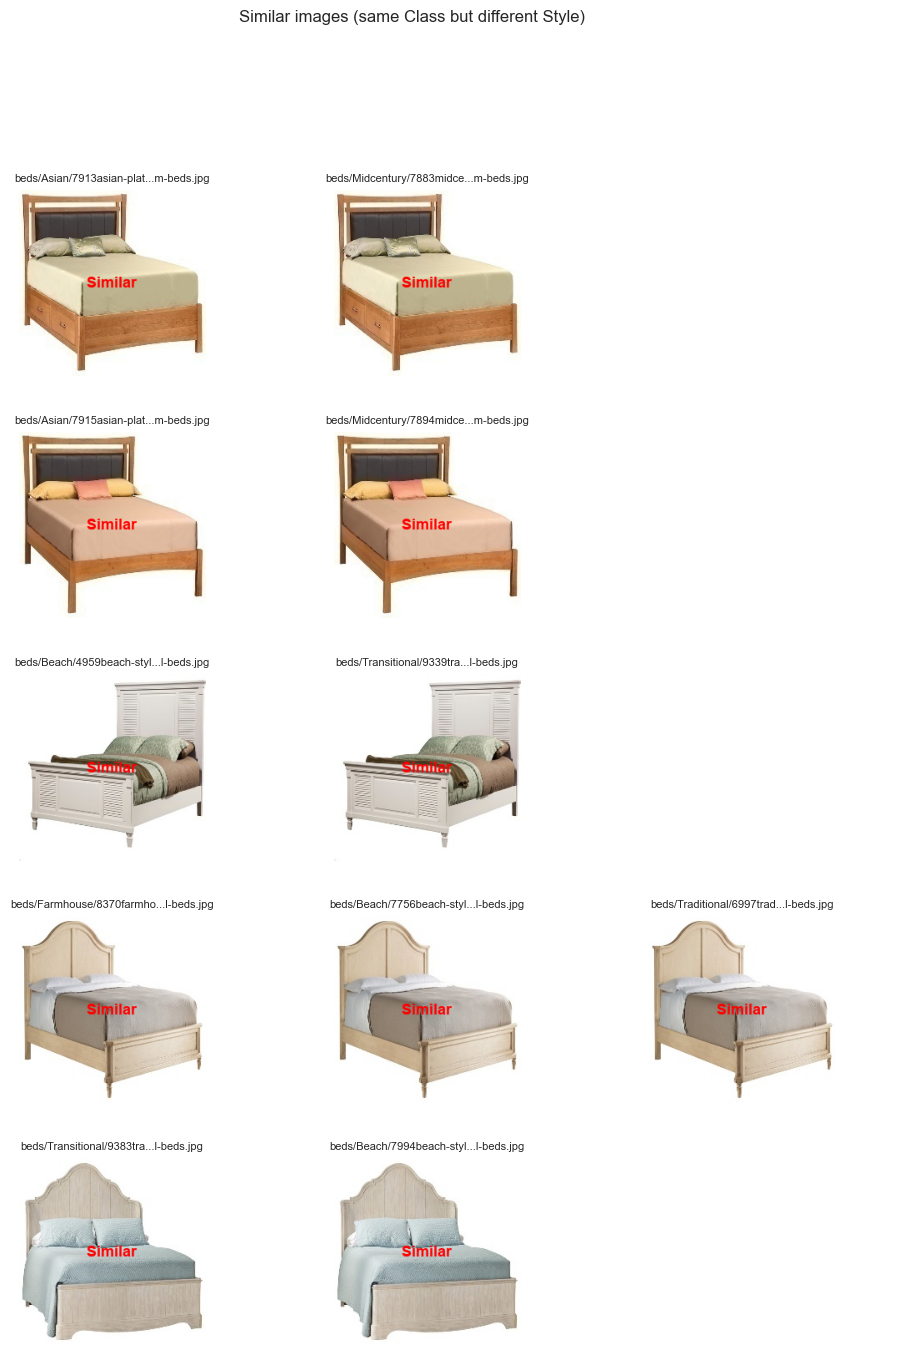

In [11]:
# Visualize duplicates with same class but different style
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Similar"], title="Similar images (same Class but different Style)")

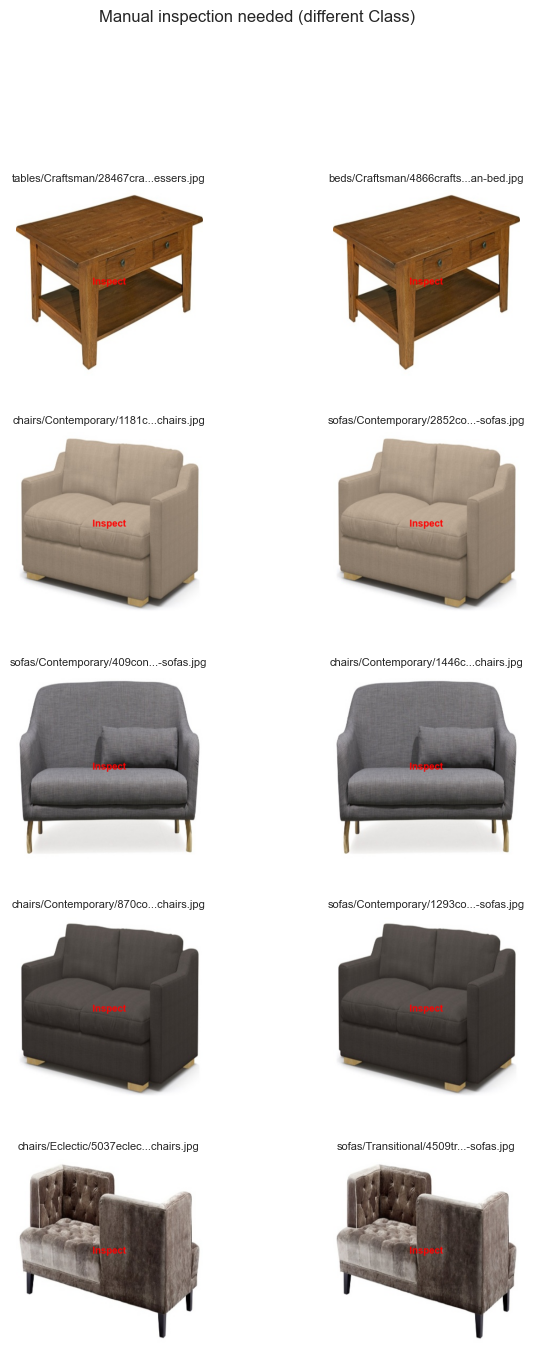

In [12]:
# Visualize duplicates from different class
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Inspect"], title="Manual inspection needed (different Class)")

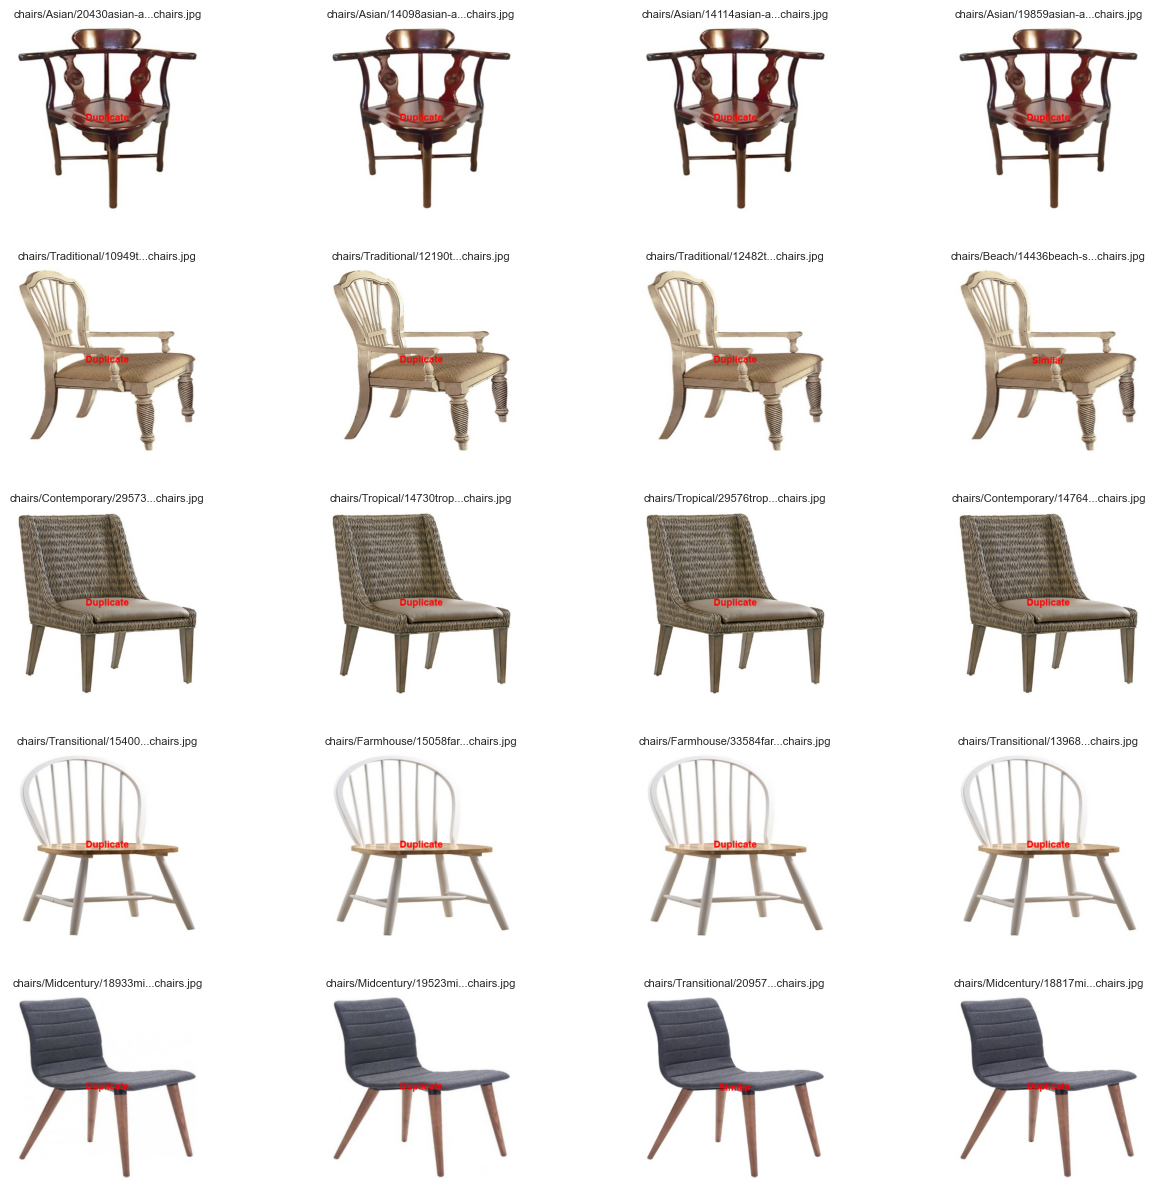

In [13]:
# Visualize images that has more than 3 duplicates
multiple_duplicates = duplicates[duplicates.groupby('Group')['Group'].transform('count') > 3]
visualize_duplicates(multiple_duplicates)

---
## Store data

In [14]:
# Create paths
processed_csv_dir = Path('../data/processed/csv')
processed_csv_dir.mkdir(parents=True, exist_ok=True)

df.to_csv(processed_csv_dir / 'df.csv', index=False) # Original DataFrame
duplicates.to_csv(processed_csv_dir / 'duplicates.csv', index=False) # Duplicates-only DataFrame